In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [18]:
Ticker ='AAPL'
start = '2023-01-01'
end= '2024-03-01'

In [19]:
data = yf.download(Ticker, start, end)

[*********************100%%**********************]  1 of 1 completed


In [20]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216293,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497505,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166634,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45074500
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900


In [21]:
df = data['Adj Close']

In [22]:
df.dropna()

Date
2023-01-03    124.216293
2023-01-04    125.497505
2023-01-05    124.166634
2023-01-06    128.735245
2023-01-09    129.261627
                 ...    
2024-02-23    182.520004
2024-02-26    181.160004
2024-02-27    182.630005
2024-02-28    181.419998
2024-02-29    180.039993
Name: Adj Close, Length: 291, dtype: float64

In [23]:
df_ = pd.DataFrame(df)

In [24]:
df_

,Adj Close
Date,
2023-01-03,124.216293
2023-01-04,125.497505
2023-01-05,124.166634
2023-01-06,128.735245
2023-01-09,129.261627
...,...
2024-02-23,182.520004
2024-02-26,181.160004
2024-02-27,182.630005


In [25]:
df_['Bull'] = np.log(df_ / df_.shift(1))

In [26]:
df_.dropna()

,Adj Close,Bull
Date,,
2023-01-04,125.497505,0.010262
2023-01-05,124.166634,-0.010661
2023-01-06,128.735245,0.036133
2023-01-09,129.261627,0.004081
2023-01-10,129.837677,0.004447
...,...,...
2024-02-23,182.520004,-0.010085
2024-02-26,181.160004,-0.007479
2024-02-27,182.630005,0.008082


In [27]:
data_ = pd.DataFrame(df_['Bull']).loc['2024-02-01':]

In [28]:
data_

,Bull
Date,
2024-02-01,0.013252
2024-02-02,-0.005420
2024-02-05,0.009798
2024-02-06,0.008595
2024-02-07,0.000581
2024-02-08,-0.005771
2024-02-09,0.004086
2024-02-12,-0.009043
2024-02-13,-0.011338


In [29]:
np.random.seed(100)

In [30]:
data_['random'] = np.random.choice([-1, 1], len(data_)) * data_['Bull']

In [31]:
data_['Bear'] = -data_['Bull']

In [32]:
data_

,Bull,random,Bear
Date,,,
2024-02-01,0.013252,-0.013252,-0.013252
2024-02-02,-0.005420,0.005420,0.005420
2024-02-05,0.009798,0.009798,-0.009798
2024-02-06,0.008595,0.008595,-0.008595
2024-02-07,0.000581,0.000581,-0.000581
2024-02-08,-0.005771,-0.005771,0.005771
2024-02-09,0.004086,-0.004086,-0.004086
2024-02-12,-0.009043,0.009043,0.009043
2024-02-13,-0.011338,0.011338,0.011338


In [33]:
def top(t):
    top = pd.DataFrame(data_['Bull'])
    top.columns = ['top']
    top = top.sort_values('top')
    n = int(len(data_) * t)
    top['top'].iloc[:n] = abs(top['top'].iloc[:n])
    top['top'].iloc[n:] = abs(top['top'].iloc[n:])
    top['top'].iloc[n:-n] = np.random.choice([-1, 1],
                                             len(top['top'].iloc[n:-n])) * top['top'].iloc[n:-n]
    data_[f'{int(t * 100)}_top'] = top.sort_index()

In [34]:
for t in [0.1, 0.15]:
    top(t)

In [35]:
def afi(ratio):
    correct = np.random.binomial(1, ratio, len(data_))
    random = np.random.choice([-1, 1], len(data_))
    strat = np.where(correct, abs(data_['Bull']), random * data_['Bull'])
    data_[f'{int(ratio * 100)}_afi'] = strat

In [36]:
for ratio in [0.51, 0.6, 0.75, 0.9]:
    afi(ratio)

In [37]:
data_.head()

,Bull,random,Bear,10_top,15_top,51_afi,60_afi,75_afi,90_afi
Date,,,,,,,,,
2024-02-01,0.013252,-0.013252,-0.013252,0.013252,0.013252,0.013252,0.013252,0.013252,0.013252
2024-02-02,-0.005420,0.005420,0.005420,0.005420,0.005420,0.005420,0.005420,0.005420,0.005420
2024-02-05,0.009798,0.009798,-0.009798,0.009798,0.009798,0.009798,0.009798,-0.009798,0.009798
2024-02-06,0.008595,0.008595,-0.008595,0.008595,0.008595,-0.008595,0.008595,0.008595,0.008595
2024-02-07,0.000581,0.000581,-0.000581,0.000581,0.000581,0.000581,0.000581,0.000581,0.000581


In [38]:
data_.tail()

,Bull,random,Bear,10_top,15_top,51_afi,60_afi,75_afi,90_afi
Date,,,,,,,,,
2024-02-23,-0.010085,0.010085,0.010085,0.010085,0.010085,0.010085,0.010085,0.010085,0.010085
2024-02-26,-0.007479,-0.007479,0.007479,-0.007479,-0.007479,-0.007479,0.007479,0.007479,0.007479
2024-02-27,0.008082,-0.008082,-0.008082,0.008082,-0.008082,-0.008082,0.008082,0.008082,-0.008082
2024-02-28,-0.006647,0.006647,0.006647,-0.006647,-0.006647,0.006647,-0.006647,0.006647,0.006647
2024-02-29,-0.007636,-0.007636,0.007636,-0.007636,0.007636,0.007636,-0.007636,0.007636,0.007636


In [39]:
data_.sum().apply(np.exp)

Bull      0.977602
random    1.001898
Bear      1.022912
10_top    1.054034
15_top    1.102677
51_afi    1.064629
60_afi    1.096752
75_afi    1.130388
90_afi    1.134275
dtype: float64

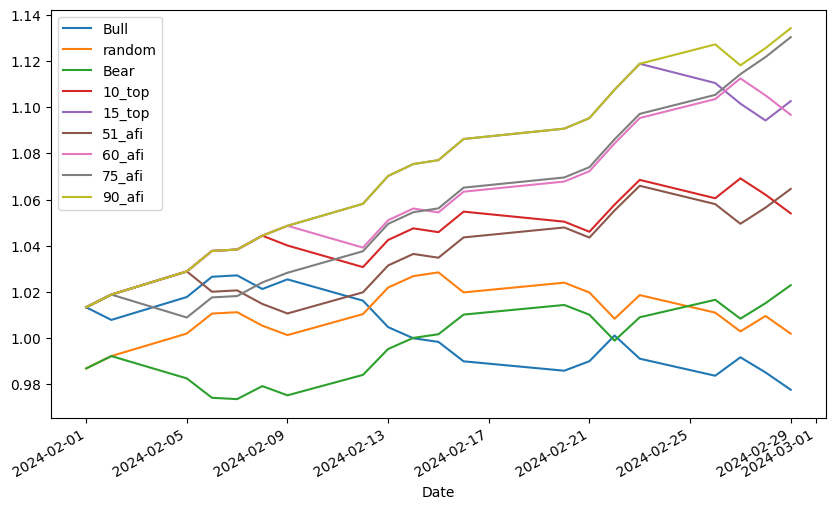

In [40]:
data_.cumsum().apply(np.exp).plot(figsize=(10, 6));